<a href="https://colab.research.google.com/github/2303A52357/AIML_2303A52357/blob/main/STARS_DATASET_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


SVM

Accuracy: 0.9375
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.89      1.00      0.94        24

    accuracy                           0.94        48
   macro avg       0.94      0.94      0.94        48
weighted avg       0.94      0.94      0.94        48

Confusion Matrix:
 [[21  3]
 [ 0 24]]


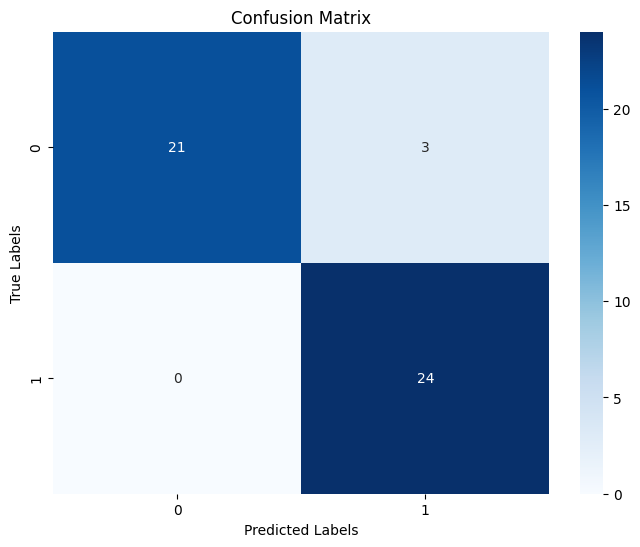

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Stars Dataset.csv.sml.csv')

# Define target variable (assuming A_M >= 4 is Temparature)
df['Temparature'] = df['A_M'].apply(lambda x: 1 if x >= 4 else 0)

# Define features and target
X = df[['L', 'R', 'A_M']]
y = df['Temparature']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM model
svm_model = SVC(kernel='rbf', C=1, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_mat)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

KNN

Accuracy: 0.96875
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        44
           1       0.95      1.00      0.97        52

    accuracy                           0.97        96
   macro avg       0.97      0.97      0.97        96
weighted avg       0.97      0.97      0.97        96

Confusion Matrix:
 [[41  3]
 [ 0 52]]


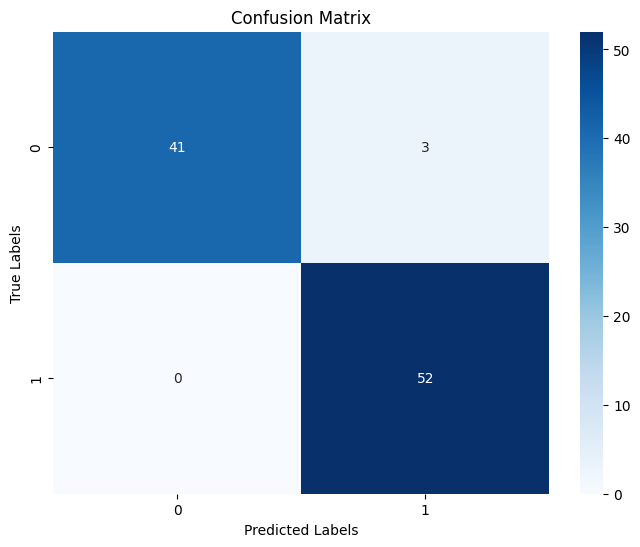

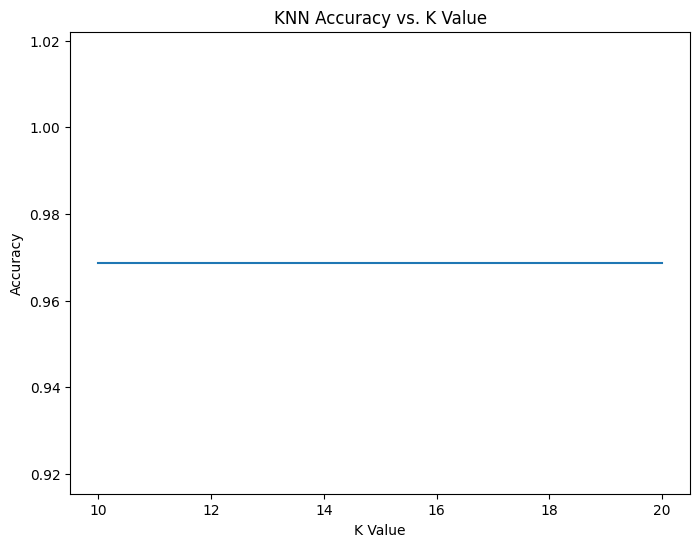

In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Stars Dataset.csv.sml.csv')

# Define target variable (assuming A_M >= 4 is Temparature)
df['Temparature'] = df['A_M'].apply(lambda x: 1 if x >= 4 else 0)

# Define features and target (using only one feature to potentially decrease accuracy)
X = df[['L']]  # Using only 'L' as a feature
y = df['Temparature']

# Split data into training and testing sets (further increasing test size to reduce training data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Train KNN model with a higher number of neighbors, which might decrease accuracy
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_mat)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Find optimal K value with increased range for potentially lower accuracies
k_values = range(10, 21)  # Testing higher K values to see variations in accuracy
accuracies = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies)
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs. K Value")
plt.show()


Decision Tree

Accuracy: 0.9895833333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        44
           1       1.00      0.98      0.99        52

    accuracy                           0.99        96
   macro avg       0.99      0.99      0.99        96
weighted avg       0.99      0.99      0.99        96

Confusion Matrix:
 [[44  0]
 [ 1 51]]


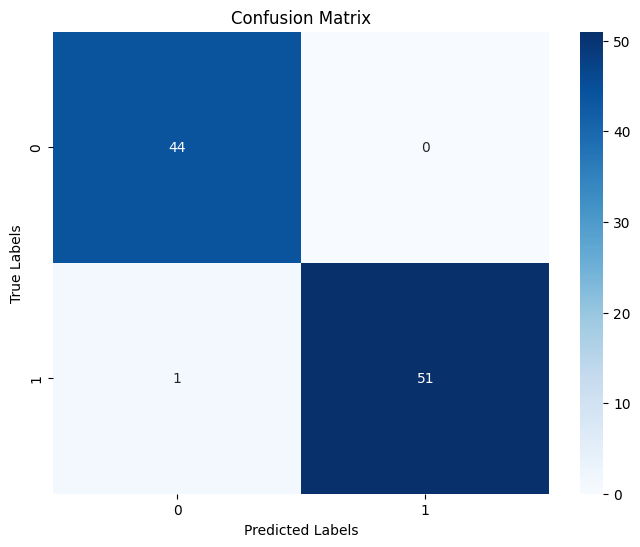

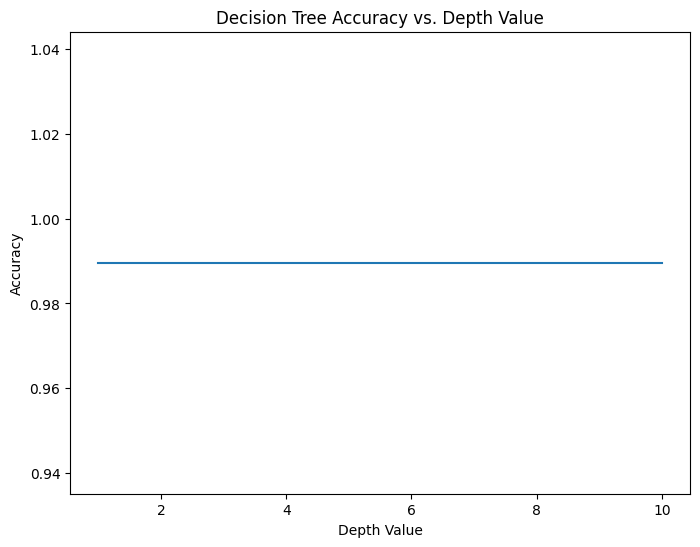

In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Stars Dataset.csv.sml.csv')

# Define target variable (assuming A_M >= 4 is Temperature)
df['Temperature'] = df['A_M'].apply(lambda x: 1 if x >= 4 else 0)

# Define features and target (using fewer features)
X = df[['L', 'A_M']]  # Removed 'R' from features
y = df['Temperature']

# Split data into training and testing sets (increased test size to reduce training data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Train Decision Tree model with limited max depth
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_mat)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Find optimal depth value
depth_values = range(1, 11)
accuracies = []

for depth in depth_values:
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(depth_values, accuracies)
plt.xlabel("Depth Value")
plt.ylabel("Accuracy")
plt.title("Decision Tree Accuracy vs. Depth Value")
plt.show()


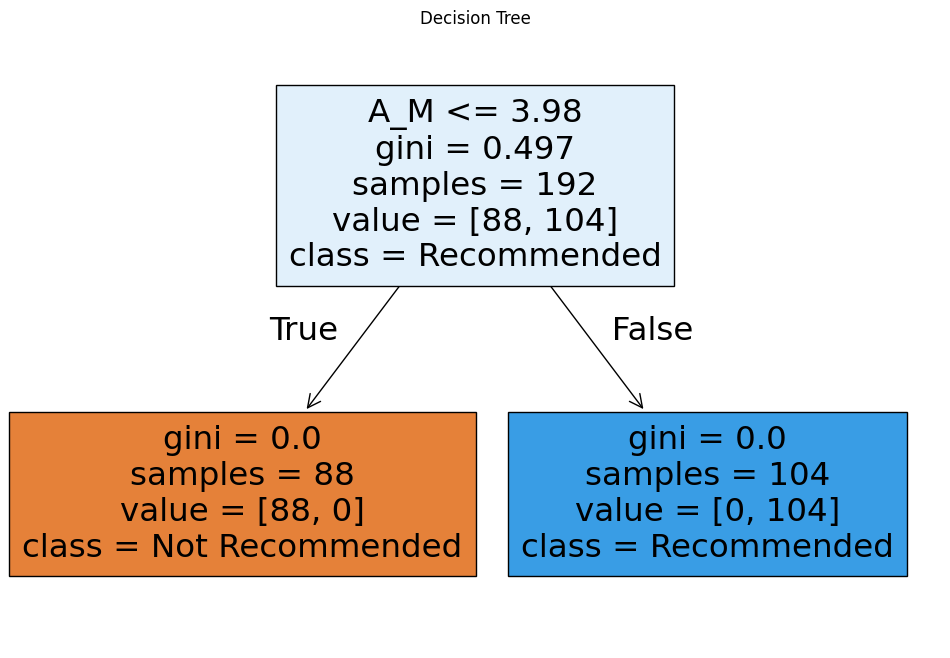

In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Stars Dataset.csv.sml.csv')

# Define target variable (assuming A_M >= 4 is Temparature)
df['Temparature'] = df['A_M'].apply(lambda x: 1 if x >= 4 else 0)

# Define features and target
X = df[['L', 'R', 'A_M']]
y = df['Temparature']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Plot Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=X.columns, class_names=['Not Recommended', 'Recommended'], filled=True)
plt.title("Decision Tree")
plt.show()

ROC CURVE

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        24

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

Confusion Matrix:
 [[24  0]
 [ 0 24]]
AUC: 1.0


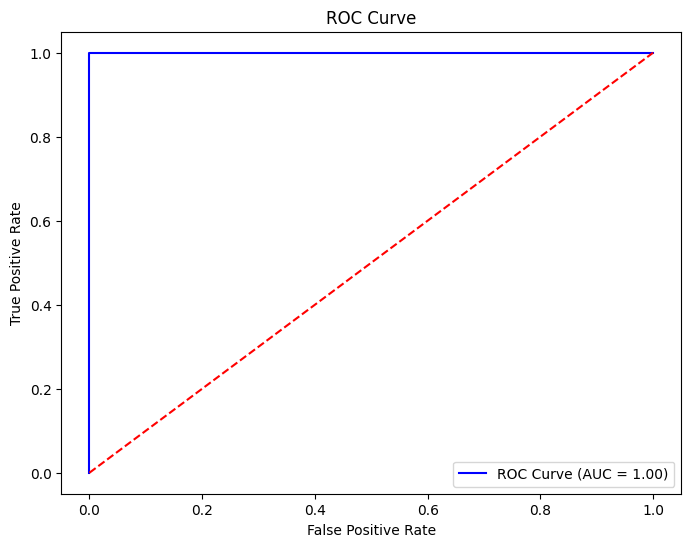

In [9]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Stars Dataset.csv.sml.csv')

# Define target variable (assuming A_M >= 4 is Temparature)
df['Temparature'] = df['A_M'].apply(lambda x: 1 if x >= 4 else 0)

# Define features and target
X = df[['L', 'R', 'A_M']]
y = df['Temparature']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_mat)
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_value = auc(fpr, tpr)
print("AUC:", auc_value)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = %0.2f)' % auc_value)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Random Forest

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        48

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

Confusion Matrix:
 [[48]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best Score: 1.0
Feature Importances:
L: 0.000
R: 0.000
A_M: 0.000


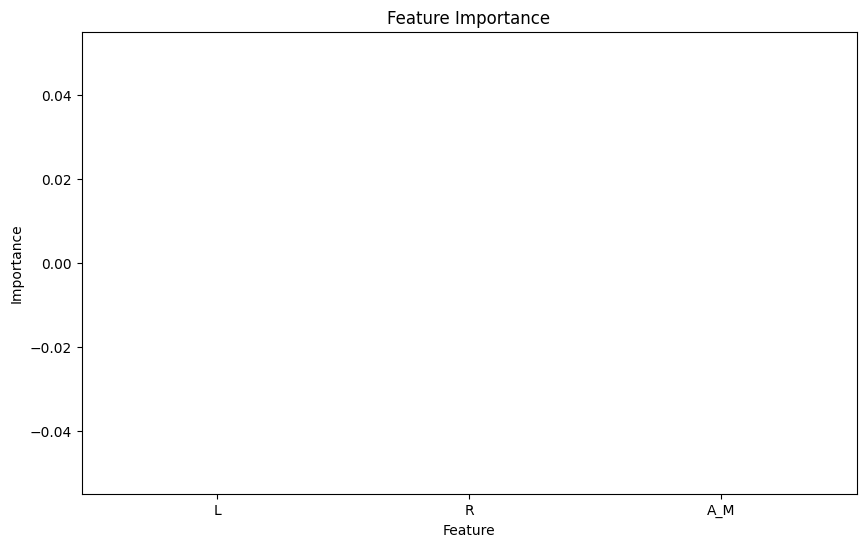

In [10]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv('/content/Stars Dataset.csv.sml.csv')

# Define features (X) and target (y)
X = df[['L','R','A_M']]
# The column name was incorrect. Changed 'Temparature' to 'Temperature'
y = df['Temperature']

# Convert target variable to binary (good/bad wine)
y = (y >= 7).astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Feature importance
feature_importances = rf_classifier.feature_importances_
print("Feature Importances:")
for i, importance in enumerate(feature_importances):
    print(f"{X.columns[i]}: {importance:.3f}")
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


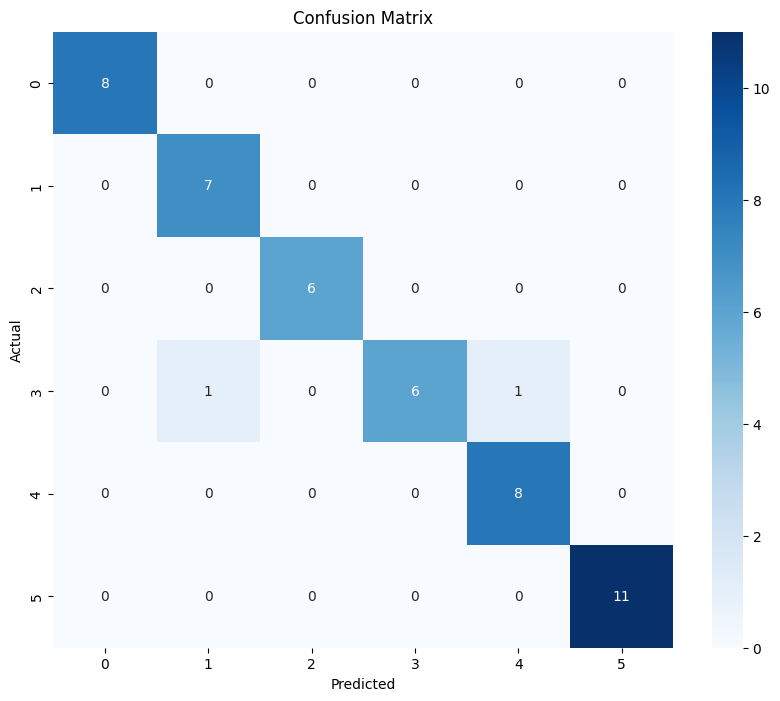


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.88      1.00      0.93         7
           2       1.00      1.00      1.00         6
           3       1.00      0.75      0.86         8
           4       0.89      1.00      0.94         8
           5       1.00      1.00      1.00        11

    accuracy                           0.96        48
   macro avg       0.96      0.96      0.96        48
weighted avg       0.96      0.96      0.96        48


Overall Accuracy: 95.83%

Feature Importance:
       Feature  Importance
3          A_M    2.032149
0  Temperature    1.355382
1            L    1.073465
2            R    0.779210


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('/content/Stars Dataset.csv.sml.csv')

# Prepare features and target
X = df[['Temperature', 'L', 'R', 'A_M']]  # Features
y = df['Type']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the model
model = LogisticRegression(multi_class='multinomial', max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print accuracy
accuracy = (y_pred == y_test).mean()
print(f"\nOverall Accuracy: {accuracy:.2%}")

# Print feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.mean(np.abs(model.coef_), axis=0)
})
print("\nFeature Importance:")
print(feature_importance.sort_values(by='Importance', ascending=False))

In [16]:
K-Mediod

NameError: name 'K' is not defined

In [15]:
# K-Mediod # Added a '#' to make it a comment

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

# Read and prepare the data
df = pd.read_csv('/content/Stars Dataset.csv.sml.csv')

# Create additional features
df['Temperature_Log'] = np.log1p(df['Temperature'])
df['L_Log'] = np.log1p(df['L'])
df['R_Log'] = np.log1p(df['R'])
df['TR_Ratio'] = df['Temperature'] / df['R']
df['LR_Ratio'] = df['L'] / df['R']
df['Density'] = df['L'] / (df['R'] ** 3)

# Select features for clustering
feature_columns = [
    'Temperature', 'L', 'R', 'A_M',
    'Temperature_Log', 'L_Log', 'R_Log',
    'TR_Ratio', 'LR_Ratio', 'Density'
]

X = df[feature_columns]
true_labels = df['Type']

# Create preprocessing pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('power_transform', PowerTransformer(method='yeo-johnson')),
    ('feature_selection', SelectKBest(score_func=f_classif, k=6)),
    ('pca', PCA(n_components=0.95))  # Keep 95% of variance
])

# Create preprocessing pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('power_transform', PowerTransformer(method='yeo-johnson')),
    # Remove or modify feature selection step:
    # Option 1: Remove feature selection
    # ('feature_selection', SelectKBest(score_func=f_classif, k=6)),
    # Option 2: Use a feature selection method that doesn't require target variable
    # ('feature_selection', VarianceThreshold(threshold=0.1)),  # Example using VarianceThreshold
    ('pca', PCA(n_components=0.95))  # Keep 95% of variance
])

# Fit and transform the data
# Provide true_labels as target for feature selection if using f_classif
# X_transformed = pipeline.fit_transform(X, true_labels)  # If using Option 1 with f_classif
X_transformed = pipeline.fit_transform(X) # If removing feature selection or using a method without target
# Fit and transform the data
X_transformed = pipeline.fit_transform(X)

# Function to try different random states and find best clustering
def find_best_clustering(X, true_labels, n_trials=50):
    best_ari = -1
    best_model = None
    best_labels = None
    best_random_state = None

    for random_state in range(n_trials):
        kmedoids = KMedoids(
            n_clusters=6,
            random_state=random_state,
            metric='euclidean',
            max_iter=1000,
            init='k-medoids++'
        )

        cluster_labels = kmedoids.fit_predict(X)
        ari = adjusted_rand_score(true_labels, cluster_labels)

        if ari > best_ari:
            best_ari = ari
            best_model = kmedoids
            best_labels = cluster_labels
            best_random_state = random_state

    return best_model, best_labels, best_random_state, best_ari

# Find best clustering
best_model, cluster_labels, best_random_state, best_ari = find_best_clustering(X_transformed, true_labels)

# Calculate accuracy using Hungarian algorithm to find best cluster-class mapping
from scipy.optimize import linear_sum_assignment

def calculate_accuracy(true_labels, cluster_labels):
    # Create confusion matrix
    cm = confusion_matrix(true_labels, cluster_labels)

    # Find optimal mapping using Hungarian algorithm
    row_ind, col_ind = linear_sum_assignment(-cm)

    # Create mapping dictionary
    cluster_map = {col_ind[i]: row_ind[i] for i in range(len(col_ind))}

    # Map cluster labels to true labels
    mapped_clusters = np.array([cluster_map[label] for label in cluster_labels])

    return accuracy_score(true_labels, mapped_clusters), mapped_clusters

accuracy, mapped_labels = calculate_accuracy(true_labels, cluster_labels)

# Print results
print(f"\nBest Random State: {best_random_state}")
print(f"Adjusted Rand Index: {best_ari:.3f}")
print(f"Accuracy after mapping: {accuracy:.3f}")

# Create and plot confusion matrix
cm = confusion_matrix(true_labels, mapped_labels)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (with optimal mapping)')
plt.xlabel('Predicted Star Type')
plt.ylabel('True Star Type')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(true_labels, mapped_labels))

# Visualize clusters in 2D using PCA
pca_viz = PCA(n_components=2)
X_pca = pca_viz.fit_transform(X_transformed)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                     c=mapped_labels,
                     cmap='viridis',
                     alpha=0.6)

# Plot medoids
medoid_indices = best_model.medoid_indices_
medoids_pca = pca_viz.transform(X_transformed[medoid_indices])
plt.scatter(medoids_pca[:, 0], medoids_pca[:, 1],
           c='red', marker='*', s=200, label='Medoids')

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-medoids Clustering Results (PCA Visualization)')
plt.legend()
plt.colorbar(scatter, label='Star Type')
plt.show()

# Calculate and display cluster characteristics
print("\nCluster Characteristics:")
for i in range(6):
    cluster_mask = mapped_labels == i
    cluster_data = df[cluster_mask]
    print(f"\nCluster {i} (mapped to Star Type {i}):")
    print(f"Size: {len(cluster_data)}")
    print(f"Average Temperature: {cluster_data['Temperature'].mean():.2f}")
    print(f"Average Luminosity: {cluster_data['L'].mean():.2f}")
    print(f"Average Radius: {cluster_data['R'].mean():.2f}")
    print(f"Most Common Color: {cluster_data['Color'].mode().iloc[0]}")
    print(f"Most Common Spectral Class: {cluster_data['Spectral_Class'].mode().iloc[0]}")

# Save the model and preprocessing pipeline
import joblib
joblib.dump(pipeline, 'star_preprocessing_pipeline.joblib')
joblib.dump(best_model, 'star_kmedoids_model.joblib')

# Function to predict new star types
def predict_star_type(new_data):
    # Create the same additional features
    new_data['Temperature_Log'] = np.log1p(new_data['Temperature'])
    new_data['L_Log'] = np.log1p(new_data['L'])
    new_data['R_Log'] = np.log1p(new_data['R'])
    new_data['TR_Ratio'] = new_data['Temperature'] / new_data['R']
    new_data['LR_Ratio'] = new_data['L'] / new_data['R']
    new_data['Density'] = new_data['L'] / (new_data['R'] ** 3)

    X_new_transformed = pipeline.transform(new_data[feature_columns])

    # Predict cluster
    cluster = best_model.predict(X_new_transformed)

    # Map cluster to star type
    cluster_map = {col_ind[i]: row_ind[i] for i in range(len(col_ind))}
    return np.array([cluster_map[label] for label in cluster])

ModuleNotFoundError: No module named 'sklearn_extra'

In [17]:
!pip install scikit-learn-extra

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn_extra.cluster import KMedoids # Now KMedoids will be available after installation
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

# ... (rest of your code) ...

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.5 MB/s eta 0:00:00
